In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [180]:
df = pd.read_pickle('../data/cleanAppleFiltered.pkl')

In [181]:
df = df.loc[df.date_x < datetime(2017, 11, 13)]

In [182]:
stop = ['really','want','always','use','getting','every','together','keep','battery']

In [183]:
pat = r'\b(?:{})\b'.format('|'.join(stop))

In [184]:
pat

'\\b(?:really|want|always|use|getting|every|together|keep|battery)\\b'

In [185]:
df['text_x'] = df['text_x'].str.replace(pat, '')

In [186]:
text_list = []

for row in range(len(df)):
    val = df.text_x.iloc[row]
    text_list.append(val)

In [187]:
all_text = ",".join(text_list)

In [188]:
# font_path = "/Library/Fonts/DIN Condensed Bold.ttf"

In [189]:
wc = WordCloud(background_color="white",max_words=20,max_font_size=60, relative_scaling=.5,
                          colormap='winter', scale=3, collocations=False)

In [190]:
wc.generate_from_text(all_text)

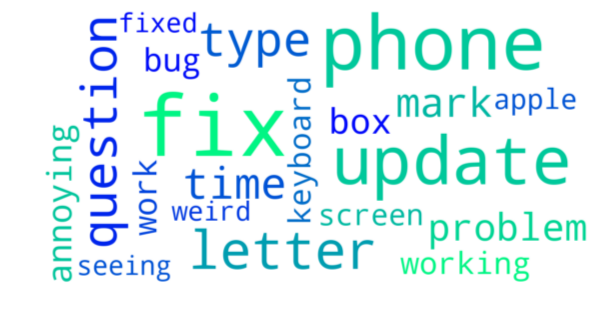

In [191]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('../presentation/wordcloud.svg')

In [104]:
text_file = open("../data/output.txt", "w")
text_file.write(all_text)
text_file.close()

## Soutwest Wordcloud

In [192]:
df2 = pd.read_pickle('../data/soutwest.pkl')

In [224]:
stop = ['really','want','always','use','getting','every','together','keep','SouthwestAir','https',
        'co','amp','flying']

In [225]:
pat = r'\b(?:{})\b'.format('|'.join(stop))

In [226]:
pat

'\\b(?:really|want|always|use|getting|every|together|keep|SouthwestAir|https|co|amp|flying)\\b'

In [227]:
df2['text_x'] = df2['text_x'].str.replace(pat, '')

In [228]:
text_list = []

for row in range(len(df2)):
    val = df2.text_x.iloc[row]
    text_list.append(val)

In [229]:
all_text2 = ",".join(text_list)

In [230]:
# font_path = "/Library/Fonts/DIN Condensed Bold.ttf"

In [231]:
wc2 = WordCloud(background_color="white",max_words=20,max_font_size=60, relative_scaling=.5,
                          colormap='winter', scale=3, collocations=False)

In [232]:
wc2.generate_from_text(all_text2)

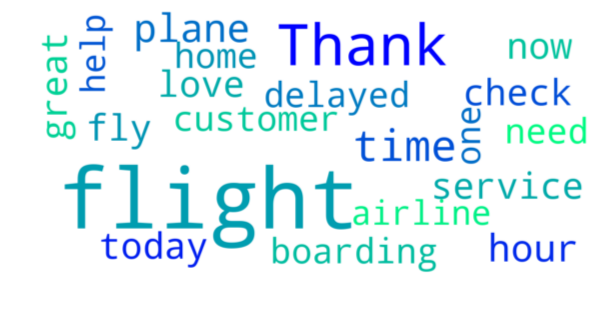

In [233]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('../presentation/wordcloudsw.svg')

In [234]:
df3 = pd.read_pickle('../data/apple2.pkl')

In [279]:
stop = ['really','want','always','use','getting','every','together','keep',
        'battery','AppleSupport','Apple','co','https','Hey','going','shit']

In [280]:
pat = r'\b(?:{})\b'.format('|'.join(stop))

In [281]:
pat

'\\b(?:really|want|always|use|getting|every|together|keep|battery|AppleSupport|Apple|co|https|Hey|going|shit)\\b'

In [282]:
df3['text_x'] = df3['text_x'].str.replace(pat, '')

In [283]:
text_list = []

for row in range(len(df3)):
    val = df3.text_x.iloc[row]
    text_list.append(val)

In [284]:
all_text3 = ",".join(text_list)

In [285]:
# font_path = "/Library/Fonts/DIN Condensed Bold.ttf"

In [286]:
wc3 = WordCloud(background_color="white",max_words=20,max_font_size=60, relative_scaling=.5,
                          colormap='winter', scale=3, collocations=False)

In [287]:
wc3.generate_from_text(all_text3)

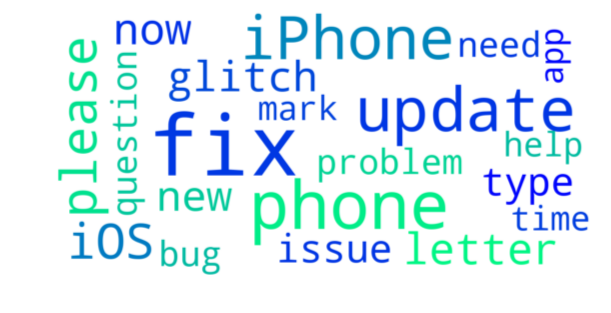

In [288]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)
plt.imshow(wc3, interpolation='bilinear')
plt.axis("off")
plt.savefig('../presentation/wordcloudsw.svg')